This README v2.0 (June, 2004) for the v2.0 polarity dataset comes from
the URL http://www.cs.cornell.edu/people/pabo/movie-review-data .

In [1]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load one file
filename = 'txt_sentoken/neg/cv000_29416.txt'
# open the file as read only
file = open(filename,'r')
# read all text
text = file.read()
# close the file
file.close()

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [5]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

In [6]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [7]:
# split into tokens by white space
tokens = text.split()
    #print(tokens)
# remove punctuation from each token
table = str.maketrans('', '',punctuation)
tokens = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
# filter out short tokens
tokens = [word for word in tokens if len(word) > 1]
    #print(tokens)

In [8]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    
    # call clean doc def
    tokens = clean_doc(doc)
    #print (tokens)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    #print(tokens)
    return ' '.join(tokens)
    #return vocab.update(tokens)

In [9]:
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        #print(path)
        # load and clean the doc
        line = doc_to_line(path, vocab)
        #print(line)
        
        # add to list
        lines.append(line)
    return lines

In [10]:
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('txt_sentoken/neg', vocab)
process_docs('txt_sentoken/pos', vocab)

# print the size of the vocab
print("Length of vocab=", len(vocab))
# print the top words in the vocab
print("Most Common Word is", vocab.most_common(50))
# keep tokens with > 5 occurrance
min_occurance = 5
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print("Number of Tokens=", len(tokens))
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

Length of vocab= 0
Most Common Word is []
Number of Tokens= 0


In [11]:
# turn a doc into clean tokens

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    #print(tokens)
    
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [12]:
# specify directory to load
directory = 'txt_sentoken/neg'
# walk through all files in the folder
for filename in listdir(directory):
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        continue
# create the full path of the file to open
    path = directory + '/' + filename
# load document
    doc = load_doc(path)
    #print('Loaded %s' % filename)
    #print(text)
    


In [13]:
# load vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# prepare negative reviews
negative_lines = process_docs('txt_sentoken/neg', vocab)
save_list(negative_lines, 'negative.txt')
# prepare positive reviews
positive_lines = process_docs('txt_sentoken/pos', vocab)
save_list(positive_lines, 'positive.txt')


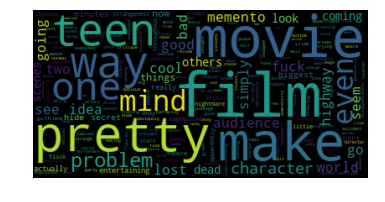

In [15]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Save the image in the img folder:
wordcloud.to_file("img/pos_wc.png")